## **VGG16 – Tutoriel – Reconnaissance d’Image** détaillé [ici](https://inside-machinelearning.com/2020/12/21/vgg16-tutoriel-reconnaissance-dimage/)

## **Charger le modèle**

On va utiliser la librairie Keras pour charger VGG-16.

Keras Application est composé de plusieurs modèles de Deep Learning qui sont mis à disposition avec des poids pré-entraînés.

Ces modèles peuvent être utilisés pour la prédiction, la feature extraction, et le fine-tuning.

Les poids pré entraînés sont chargés automatiquement lors de l'initialisation d'un modèle.

Dans Keras Application, VGG-16 a été entraînés sur plus d'un million d'images de la base de données ImageNet.

Ce réseau de neurones peut classer les images en 1000 classes d'objets, tels que des voitures, des souris, des crayons et de nombreux animaux.

Grâce au Transfert Learning, on peut directement utiliser ce réseau de neurones. C'est un gain de temps considérable étant donné que, sans Keras, il faudrait plusieurs heures pour entraîner soi-même ce modèle sur ImageNet.

On charge donc le modèle:



In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553467904/553467096 [==============================] - 4s 0us/step


On peut voir les différentes couches qui composent le modèle avec la fonction summary().


Comme vu [ici](https://inside-machinelearning.com), il est principalement composé de 13 couches convolutionnelles et de 3 couches entièrement connectées.

In [ ]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## **Chargement et pré-traitement de l'image**

Ensuite, on charge notre image, pour utiliser le modèle.

La taille de l'image d'entrée par défaut de VGG-16 est de 224×224. On redimensionne donc notre image.

In [ ]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('/content/ice-bear-hans-jurgen-mager-unsplash.jpg', target_size=(224, 224))

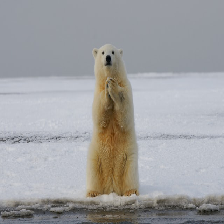

In [ ]:
image.show()

Petit rappel: Un modèle de Machine Learning ne prend toujours que des numériques en entrée.

Il faut donc que nous convertissons notre image en matrice de pixels. Pour ce faire on transforme notre image en numpy.array avec la fonction img_to_array().

In [ ]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

La dimension de l'image d'entrée par défaut de VGG-16 est (None,224,224,3).

Il nous faut donc ajouter une autre dimension a notre matrice. 

In [ ]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

Ensuite, les pixels de l'image doivent être traité de la même manière que les données d'entraînement d'ImageNet ont été préparées. 

Expliqué plus précisément, dans le [papier de recherche](https://www.robots.ox.ac.uk/~vgg/publications/2015/Simonyan15/) de Karen Simonyan et Andrew Zisserman :

"Le seul prétraitement que nous faisons est de soustraire de chaque pixel la valeur RVB moyenne, calculée sur le jeu de données de d'entrainement."


Keras fournit une fonction appelée preprocess_input() pour faire un tel pré-traitement (encore appelé preprocessing).

In [ ]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

### **Faire la prédiction**

Enfin, on peut faire une prédiction sur notre image avec le modèle.

In [ ]:
# predict the probability across all output classes
prediction = model.predict(image)

Allez, encore un dernier traitement pour décoder notre prédiction et nous pourrons voir le résultat de notre algorithme !

In [ ]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(prediction)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

ice_bear (99.95%)


Selon VGG-16 l'image à une probabilité de 99.95% de contenir un ours polaire. Plutôt bien, non ?

En fait VGG-16 ne retourne pas une seul prédiction mais la liste des 1000 classes sur lequel il a été pré-entraîné avec, associé, la probabilité que cette classe soit dans l'image.

Voici le top 3 des classes que VGG-16 a prédit dans notre image:

In [ ]:
labels = decode_predictions(prediction)
# print the classification
print('%s (%.2f%%)' % (labels[0][0][1], labels[0][0][2]*100))
print('%s (%.2f%%)' % (labels[0][1][1], labels[0][1][2]*100))
print('%s (%.2f%%)' % (labels[0][2][1], labels[0][2][2]*100))

ice_bear (99.95%)
weasel (0.03%)
otter (0.01%)


source: https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/